In [1]:
import cv2
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode
import numpy as np
import itertools
from tqdm import tqdm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


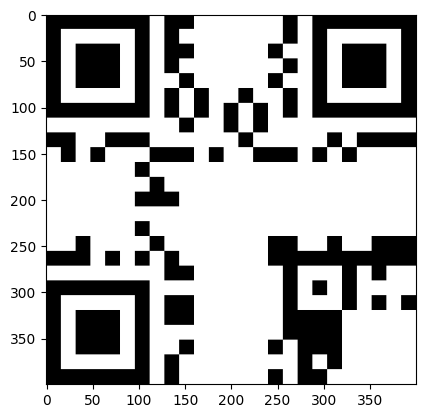

In [2]:
pieces = [cv2.imread(f'hard/hard_{i}.png') for i in range(25)]
pieces_raw = [cv2.imread(f'hard/hardraw_{i}.png') for i in range(25)]
pieces[11] = pieces[0][:, ::-1, :]
pieces_raw[11] = pieces_raw[0][:, ::-1, :]
h, w, _ = pieces[0].shape
res = np.zeros((5*h, 5*w, _)) + 255

target = [(0, 0, 11), (0, 1, 9),              (0, 3, 20), (0, 4, 0),
          (1, 0, 3),  (1, 1, 4),  (1, 2, 22), (1, 3, 19), (1, 4, 17),
                      (2, 1, 6),
          (3, 0, 15), (3, 1, 23),             (3, 3, 18), (3, 4, 24),
          (4, 0, 13), (4, 1, 7),              (4, 3, 14)]

for i, j, n in target:
    res[h*(i):h*(i+1), w*(j):w*(j+1)] = pieces_raw[n]
rest_places = [(0, 2), (2, 0), (2, 2), (2, 3), (2, 4), (3, 2), (4, 2), (4, 4)]
rest_pieces = [8, 5, 16, 12, 10, 1, 2, 21]
plt.imshow(res)

In [3]:
nums = [0, 1, 2, 3, 4, 5, 6, 7]
permutations = list(itertools.permutations(nums))
print(len(permutations))

for ps in tqdm(permutations):
    tmp_res = res.copy()
    for k, p in enumerate(ps):
        i, j = rest_places[k]
        n = rest_pieces[p]
        tmp_res[h*(i):h*(i+1), w*(j):w*(j+1)]  = pieces_raw[n]
    for barcode in decode(tmp_res):
        print(barcode)
        myData=barcode.data.decode('utf-8')
        print(myData)

40320


 41%|████      | 16631/40320 [01:04<01:29, 264.26it/s]

Decoded(data=b'flag{God-Amazing-I-Love-Huawei}', type='QRCODE', rect=Rect(left=3, top=3, width=396, height=396), polygon=[Point(x=3, y=3), Point(x=3, y=395), Point(x=399, y=399), Point(x=395, y=3)], quality=1, orientation='UP')
flag{God-Amazing-I-Love-Huawei}


100%|██████████| 40320/40320 [02:35<00:00, 259.51it/s]
